# Mass Balance Analysis: Analysing Tracer Mass and Fluxes in TUFLOW FV Outputs

**This notebook provides a guide on how to import and preprocess the necessary data files, create data frames, and perform calculations to derive useful metrics for tracer mass and fluxes.**

## Import Libraries

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

## Read tuflowfv tracer mass output csv  
**'TRACE_1_MASS [units]'** represents the mass of tracer 1 in the whole model domain.   
Units are *concentration units x m<sup>3</sup>*.  
We have used the conconetration units as **ng/L** (nanograms per litre) for this exercise.


In [17]:
mass_bal = r"K:\scratchers\MASS.csv"
df_mass = pd.read_csv(mass_bal, delimiter=',', usecols=['TIME', 'VOLUME [m^3]', 'TRACE_1_MASS [units]'])

# head of mass_bal dataframe
print(df_mass.head())

                  TIME  VOLUME [m^3]  TRACE_1_MASS [units]
0  01/10/2018 00:00:00  7.871680e+11                   0.0
1  01/10/2018 01:00:10  7.899846e+11                   0.0
2  01/10/2018 02:00:08  7.845009e+11                   0.0
3  01/10/2018 03:00:03  7.776127e+11                   0.0
4  01/10/2018 04:00:14  7.729145e+11                   0.0


## Create additional columns for trcaer mass dataframe
Two new columns are added to the dataframe df_mass.  
'TRACE_1_MASS [g]' is created deviding TRACE_1_MASS [units] by 10<sup>6</sup>.    
'TRACE_1_CONC' is the concentration of the TRACE_1 which has units of **g/m<sup>3</sup> or mg/L**

In [18]:
df_mass['TRACE_1_MASS [g]'] = df_mass['TRACE_1_MASS [units]'] / 1000000
df_mass['TRACE_1_CONC'] = df_mass['TRACE_1_MASS [g]'] / df_mass['VOLUME [m^3]']
print(df_mass.head())

                  TIME  VOLUME [m^3]  TRACE_1_MASS [units]  TRACE_1_MASS [g]  \
0  01/10/2018 00:00:00  7.871680e+11                   0.0               0.0   
1  01/10/2018 01:00:10  7.899846e+11                   0.0               0.0   
2  01/10/2018 02:00:08  7.845009e+11                   0.0               0.0   
3  01/10/2018 03:00:03  7.776127e+11                   0.0               0.0   
4  01/10/2018 04:00:14  7.729145e+11                   0.0               0.0   

   TRACE_1_CONC  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Read tuflowfv tracer flux output csv
In this exercise fluxes through two  nodestings are considered.  
For ex; *'NS1_TRACE_1_FLUX' and 'NS2_TRACE_1_FLUX'* represent the flux through the nodestring 1 and 2 respectively.  
Flux Units are *m<sup>3</sup> s<sup>-1</sup>*.  

In [19]:
# read tuflowfv flux output csv
flux= r"K:\scratchers\FLUX.csv"
df_flux = pd.read_csv(flux, delimiter=',', usecols=['TIME', 'NS1_FLOW [m^3 s^-1]', 'NS2_FLOW [m^3 s^-1]', 'NS1_TRACE_1_FLUX [units m^3 s^-1]', 'NS2_TRACE_1_FLUX [units m^3 s^-1]'])
# head of flux dataframe
print(df_flux.head())

                  TIME  NS1_FLOW [m^3 s^-1]  \
0  01/10/2018 00:00:00                  0.0   
1  01/10/2018 01:00:10            -134333.7   
2  01/10/2018 02:00:08             799288.8   
3  01/10/2018 03:00:03             513126.3   
4  01/10/2018 04:00:14             153102.7   

   NS1_TRACE_1_FLUX [units m^3 s^-1]  NS2_FLOW [m^3 s^-1]  \
0                                0.0                 0.00   
1                                0.0             94314.29   
2                                0.0           1035166.00   
3                                0.0            770842.90   
4                                0.0            607895.00   

   NS2_TRACE_1_FLUX [units m^3 s^-1]  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0  


## Create additional columns for trcaer flux dataframe

Three new columns are added to the dataframe df_flux.  
'TRACE_1_Tot_Flux is created by adding 'NS1_TRACE_1_FLUX' and 'NS2_TRACE_1_FLUX' together.  
'TRACE_1_Tot_Flux [g/hr]' is created with unit converstions of 'TRACE_1_Tot_Flux [units/s]'.  
'TRACE_1_Tot_Flux_cumu [g/hr]' is created with cumulative values 'TRACE_1_Tot_Flux [g/hr]'.  

In [20]:
#Add to fluxes at two nodestrings NS1 and NS2
df_flux['TRACE_1_Tot_Flux [units/s]'] = df_flux['NS1_TRACE_1_FLUX [units m^3 s^-1]'] + df_flux['NS2_TRACE_1_FLUX [units m^3 s^-1]']

#convert flux units from ng/L*m3/s to g/hr
df_flux['TRACE_1_Tot_Flux [g/hr]'] = df_flux['TRACE_1_Tot_Flux [units/s]'] / 1000000 *3600
df_flux['TRACE_1_Tot_Flux_cumu [g/hr]'] = df_flux['TRACE_1_Tot_Flux [g/hr]'].cumsum()
print(df_flux.head())


                  TIME  NS1_FLOW [m^3 s^-1]  \
0  01/10/2018 00:00:00                  0.0   
1  01/10/2018 01:00:10            -134333.7   
2  01/10/2018 02:00:08             799288.8   
3  01/10/2018 03:00:03             513126.3   
4  01/10/2018 04:00:14             153102.7   

   NS1_TRACE_1_FLUX [units m^3 s^-1]  NS2_FLOW [m^3 s^-1]  \
0                                0.0                 0.00   
1                                0.0             94314.29   
2                                0.0           1035166.00   
3                                0.0            770842.90   
4                                0.0            607895.00   

   NS2_TRACE_1_FLUX [units m^3 s^-1]  TRACE_1_Tot_Flux [units/s]  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4         

### Slice the dataframe based on start nd end times

In [21]:
#add start and end time to slice them easier
start_time = '01/10/2018 00:00:00'
end_time = '01/02/2019 00:00:00'

# Convert 'TIME' column to datetime format
df_mass['TIME'] = pd.to_datetime(df_mass['TIME'], dayfirst=True)
df_flux['TIME'] = pd.to_datetime(df_flux['TIME'], dayfirst=True)

# Convert start and end times to datetime format
start_time = pd.to_datetime(start_time, dayfirst=True)
end_time = pd.to_datetime(end_time, dayfirst=True)

# Slice the dataframe based on the start and end times
df_slicemass = df_mass[(df_mass['TIME'] >= start_time) & (df_mass['TIME'] <= end_time)]
df_sliceflux = df_flux[(df_flux['TIME'] >= start_time) & (df_flux['TIME'] <= end_time)]

#head rows
#print(df_slicemass.head())
#print(df_sliceflux.head())


### Merge the two data frames based on 'TIME'

In [22]:
merged_df = pd.merge(df_slicemass, df_sliceflux, on='TIME')
#print(merged_df.head())


### Add new column for the net mass and net concnetration.    
Net concnetration is a hypothetical variable.  

In [23]:
merged_df['TRACE_1_net_mass [g]'] = merged_df['TRACE_1_MASS [g]'] + merged_df['TRACE_1_Tot_Flux_cumu [g/hr]']
merged_df['TRACE_1_NET_CONC'] = merged_df['TRACE_1_net_mass [g]'] / merged_df['VOLUME [m^3]']
print(merged_df.head())

                 TIME  VOLUME [m^3]  TRACE_1_MASS [units]  TRACE_1_MASS [g]  \
0 2018-10-01 00:00:00  7.871680e+11                   0.0               0.0   
1 2018-10-01 01:00:10  7.899846e+11                   0.0               0.0   
2 2018-10-01 02:00:08  7.845009e+11                   0.0               0.0   
3 2018-10-01 03:00:03  7.776127e+11                   0.0               0.0   
4 2018-10-01 04:00:14  7.729145e+11                   0.0               0.0   

   TRACE_1_CONC  NS1_FLOW [m^3 s^-1]  NS1_TRACE_1_FLUX [units m^3 s^-1]  \
0           0.0                  0.0                                0.0   
1           0.0            -134333.7                                0.0   
2           0.0             799288.8                                0.0   
3           0.0             513126.3                                0.0   
4           0.0             153102.7                                0.0   

   NS2_FLOW [m^3 s^-1]  NS2_TRACE_1_FLUX [units m^3 s^-1]  \
0            

### A quick check of cumulative flux

In [25]:
#Calculate tracer flux mean
df_mean = merged_df['TRACE_1_Tot_Flux [g/hr]'].mean()
print('Mean flux:', df_mean)
tot_flux = df_mean * 24 *30 *4
print('Total flux:', tot_flux)

#Get the sum
flux_sum = merged_df['TRACE_1_Tot_Flux [g/hr]'].sum()
print('Total flux:', flux_sum)

Mean flux: 0.17341253262214235
Total flux: 499.42809395177
Total flux: 511.91379630056423


# Plot

## Volume

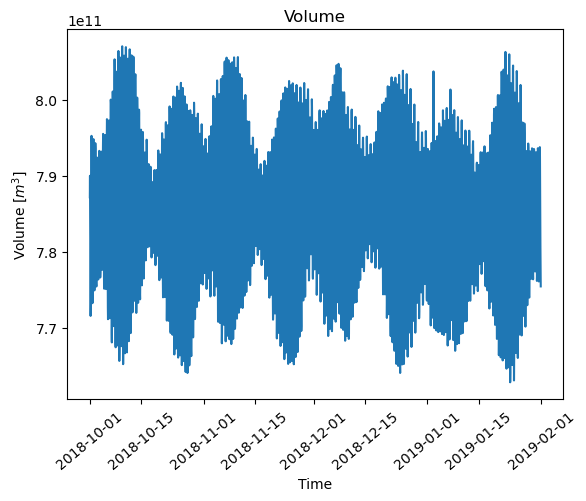

In [36]:
# Plot timeseries for 'VOLUME [m^3]'
plt.plot(merged_df['TIME'], merged_df['VOLUME [m^3]'])
plt.title('Volume')
plt.xlabel('Time')
plt.ylabel('Volume [$m^3$]')
#plt.ylim((7, 9))
plt.xticks(rotation=40)
plt.show()

## Tracer Mass   
The reason for missing treacer mass is that it leaves the model domain boundary as tracer fluxes.

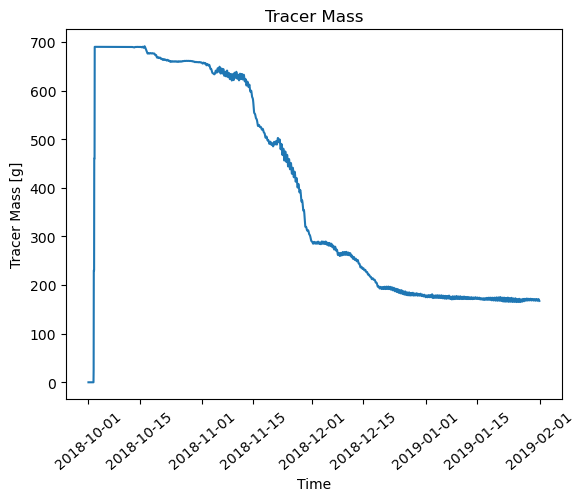

In [26]:
# Plot timeseries for 'TRACE_1_MASS [g]'
plt.plot(merged_df['TIME'], merged_df['TRACE_1_MASS [g]'])
plt.title('Tracer Mass')
plt.xlabel('Time')
plt.ylabel('Tracer Mass [g]')
plt.xticks(rotation=40)
plt.show()

### Tracer Fluxes

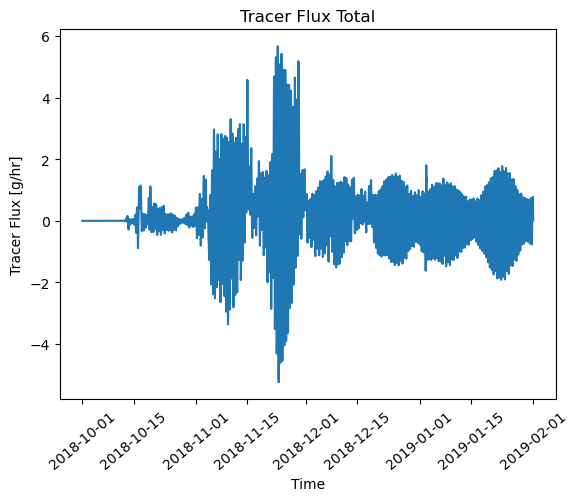

In [31]:
#Plot timeseries for 'TRACE_1_Tot_Flux [g/hr]' at NS2
plt.plot(merged_df['TIME'], merged_df['TRACE_1_Tot_Flux [g/hr]'])
plt.title('Tracer Flux Total')
plt.xlabel('Time')
plt.ylabel('Tracer Flux [g/hr]')
plt.xticks(rotation=40)
plt.show()

Total cumulative tracer flux should equal to the missing tracer mass. 

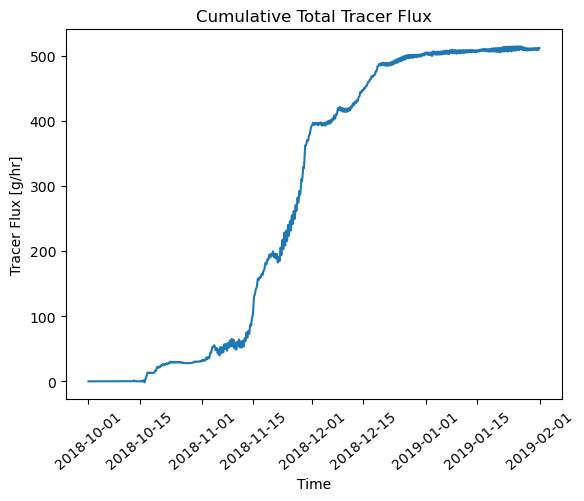

In [32]:
#Plot timeseries for 'Cumulative Total Tracer Flux
plt.plot(merged_df['TIME'], merged_df['TRACE_1_Tot_Flux_cumu [g/hr]'])
plt.title('Cumulative Total Tracer Flux')
plt.xlabel('Time')
plt.ylabel('Tracer Flux [g/hr]')
plt.xticks(rotation=40)
plt.show()

## Cumulative tracer fllux vs tracer mass

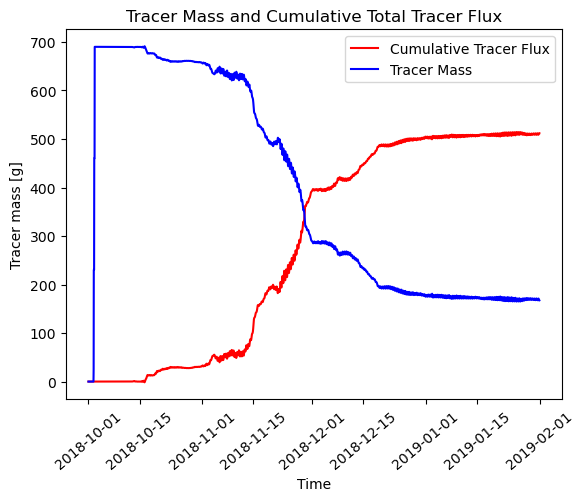

In [14]:
# Plot timeseries for 'Cumulative Total Tracer Flux'
plt.plot(merged_df['TIME'], merged_df['TRACE_1_Tot_Flux_cumu [g/hr]'], color='red', label='Cumulative Tracer Flux')

# Plot timeseries for 'TRACE_1_MASS [g]'
plt.plot(merged_df['TIME'], merged_df['TRACE_1_MASS [g]'], color='blue', label='Tracer Mass')

plt.title('Tracer Mass and Cumulative Total Tracer Flux')
plt.xlabel('Time')
plt.ylabel('Tracer mass [g]')
plt.xticks(rotation=40)
plt.legend()
plt.show()


## Net tracer mass

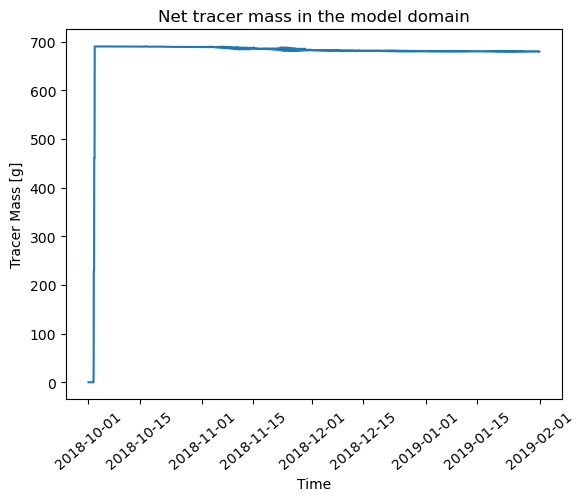

In [15]:
# Add tracer mass and cumulative flux together
# Plot timeseries for 'TRACE_1_NetMASS [g]'
plt.plot(merged_df['TIME'], merged_df['TRACE_1_net_mass [g]'])
plt.title('Net tracer mass in the model domain')
plt.xlabel('Time')
plt.ylabel('Tracer Mass [g]')
plt.xticks(rotation=40)
plt.show()

## Check Mass Balance Error

In [34]:
# Find the total mass of tracer present in the model domain at the end of simulation
final_tracer_mass = merged_df['TRACE_1_net_mass [g]'].iloc[-1]

# Set the time of mass added (considering only the minute part of the time)
mass_added_time = pd.to_datetime('02/10/2018 17:00', format='%d/%m/%Y %H:%M')

In [35]:
# Find the mass of tracer added
df_time = merged_df.copy()
df_time['TIME'] = pd.to_datetime(df_time['TIME'], format='%d/%m/%Y %H:%M:%S')
mass_added = df_time.loc[df_time['TIME'].dt.strftime('%d/%m/%Y %H:%M') == mass_added_time.strftime('%d/%m/%Y %H:%M'), 'TRACE_1_net_mass [g]'].iloc[0]
# Calculate the mass balance error as a percentage
mass_balance_error = ((final_tracer_mass - mass_added) / mass_added) * 100

print('Mass balance error: {:.2f}%'.format(mass_balance_error))

Mass balance error: -1.54%


## Concentration plots
#### Concentration based on mass excluding fluxes at the boundary

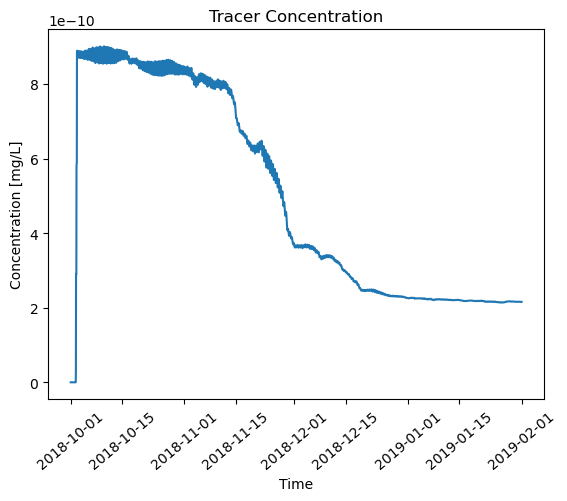

In [36]:
# Plot timeseries for 'Tracer Concentration'
plt.plot(merged_df['TIME'], merged_df['TRACE_1_CONC'])
plt.title('Tracer Concentration')
plt.xlabel('Time')
plt.ylabel('Concentration [mg/L]')
#plt.ylim((7.7e-10, 7.8e-10))
plt.xticks(rotation=40)
plt.show()

### Concentration based on net mass including fluxes at the boundary¶

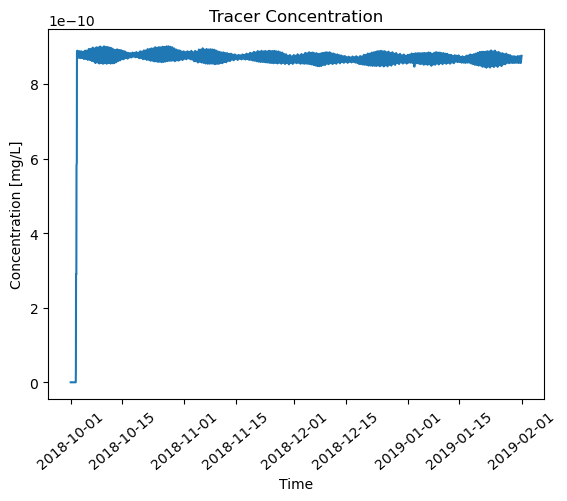

In [37]:
# Plot timeseries for 'Tracer Concentration'
plt.plot(merged_df['TIME'], merged_df['TRACE_1_NET_CONC'])
plt.title('Tracer Concentration')
plt.xlabel('Time')
plt.ylabel('Concentration [mg/L]')
#plt.ylim((7.7e-10, 7.8e-10))
plt.xticks(rotation=40)
plt.show()

## Create figures
### Tracer Mass excluding fluxes

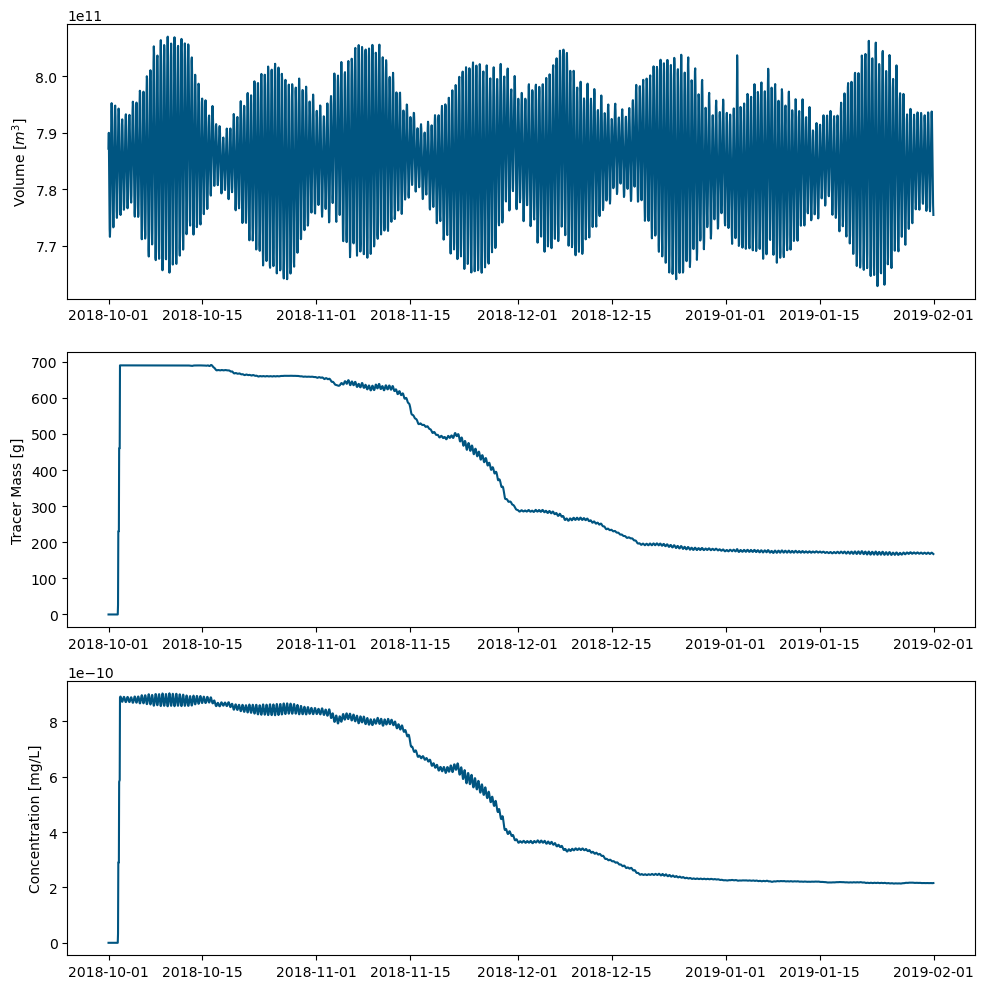

FileNotFoundError: [Errno 2] No such file or directory: 'figures/SiteA_Mass_Balance_highdif1.png'

In [39]:
# Create a figure with three subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Plot timeseries for 'VOLUME [m^3]'
axs[0].plot(merged_df['TIME'], merged_df['VOLUME [m^3]'],color='#005581')
#axs[0].set_title('Volume')
#axs[0].set_xlabel('Time')
axs[0].set_ylabel('Volume [$m^3$]')
axs[0].tick_params(axis='x', rotation=0)

# Plot timeseries for 'TRACE_1_MASS [g]'
axs[1].plot(merged_df['TIME'], merged_df['TRACE_1_MASS [g]'],color='#005581')
#axs[1].set_title('Tracer Mass')
#axs[1].set_xlabel('Time')
axs[1].set_ylabel('Tracer Mass [g]')
axs[1].tick_params(axis='x', rotation=0)

# Plot timeseries for 'Tracer Concentration'
axs[2].plot(merged_df['TIME'], merged_df['TRACE_1_CONC'],color='#005581')
#axs[2].set_title('Tracer Concentration')
#axs[2].set_xlabel('Time')
axs[2].set_ylabel('Concentration [mg/L]')
axs[2].tick_params(axis='x', rotation=0)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the figure
plt.show()
fig.savefig('figures/SiteA_Mass_Balance_highdif1.png',dpi=300)
#fig.savefig('my_figure.png', dpi=300, bbox_inches='tight')


## Net tracer mass including fluxes at the boundary

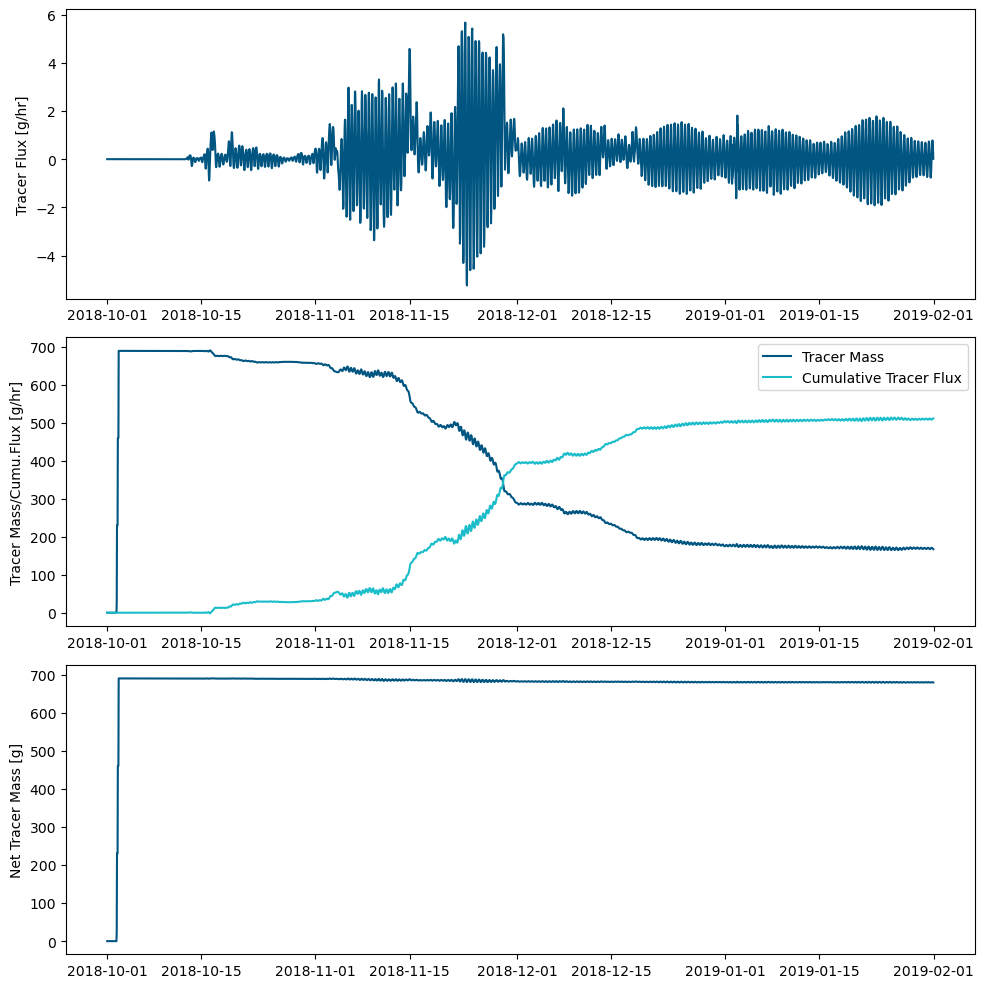

FileNotFoundError: [Errno 2] No such file or directory: 'figures/SiteA_Mass_Balance_highdif2.png'

In [40]:
# Create a figure with three subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Plot timeseries for 'VOLUME [m^3]'
axs[0].plot(merged_df['TIME'], merged_df['TRACE_1_Tot_Flux [g/hr]'],color='#005581', label='Total Tracer Flux')
#axs[0].plot(merged_df['TIME'], merged_df['TRACE_1_Tot_Flux_cumu [g/hr]'], color='#1ABDC9', label='Cumulative Tracer Flux')
#axs[0].set_title('Volume')
#axs[0].set_xlabel('Time')
axs[0].set_ylabel('Tracer Flux [g/hr]')
axs[0].tick_params(axis='x', rotation=0)

# Plot timeseries for 'TRACE_1_MASS [g]'
axs[1].plot(merged_df['TIME'], merged_df['TRACE_1_MASS [g]'],color='#005581', label='Tracer Mass')
axs[1].plot(merged_df['TIME'], merged_df['TRACE_1_Tot_Flux_cumu [g/hr]'], color='#1ABDC9', label='Cumulative Tracer Flux')

#axs[1].set_title('Tracer Mass')
#axs[1].set_xlabel('Time')
axs[1].legend(loc='upper right')
axs[1].set_ylabel('Tracer Mass/Cumu.Flux [g/hr]')
axs[1].tick_params(axis='x', rotation=0)

# Plot timeseries for 'Tracer Concentration'
axs[2].plot(merged_df['TIME'], merged_df['TRACE_1_net_mass [g]'],color='#005581')
#axs[2].set_title('Tracer Concentration')
#axs[2].set_xlabel('Time')
axs[2].set_ylabel('Net Tracer Mass [g]')
axs[2].tick_params(axis='x', rotation=0)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the figure
plt.show()
fig.savefig('figures/SiteA_Mass_Balance_highdif2.png',dpi=300)
#fig.savefig('my_figure.png', dpi=300, bbox_inches='tight')


### Other plots

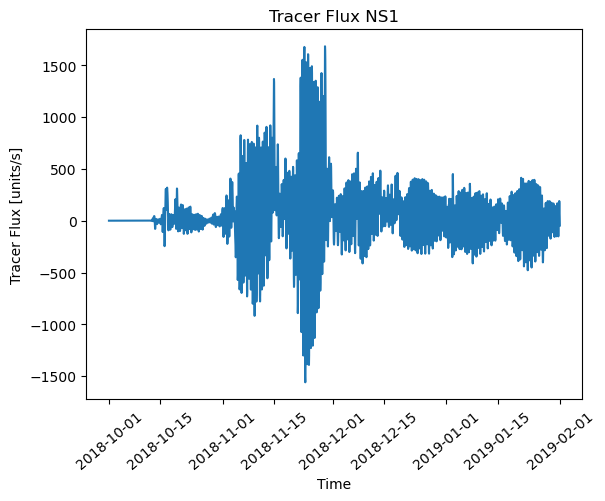

In [172]:
#Plot timeseries for 'TRACE_1_Tot_Flux [g/hr]' at NS1
plt.plot(merged_df['TIME'], merged_df['NS1_TRACE_1_FLUX [units m^3 s^-1]'])
plt.title('Tracer Flux NS1')
plt.xlabel('Time')
plt.ylabel('Tracer Flux [units/s]')
plt.xticks(rotation=40)
plt.show()

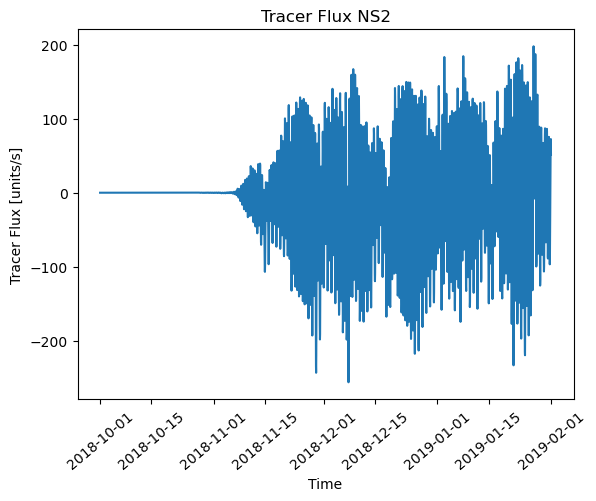

In [173]:
#Plot timeseries for 'TRACE_1_Tot_Flux [g/hr]' at NS2
#plt.plot(df_sliceflux['TIME'], df_sliceflux['TRACE_1_Tot_Flux [g/hr]'])
plt.plot(merged_df['TIME'], merged_df['NS2_TRACE_1_FLUX [units m^3 s^-1]'])
plt.title('Tracer Flux NS2')
plt.xlabel('Time')
plt.ylabel('Tracer Flux [units/s]')
plt.xticks(rotation=40)
plt.show()

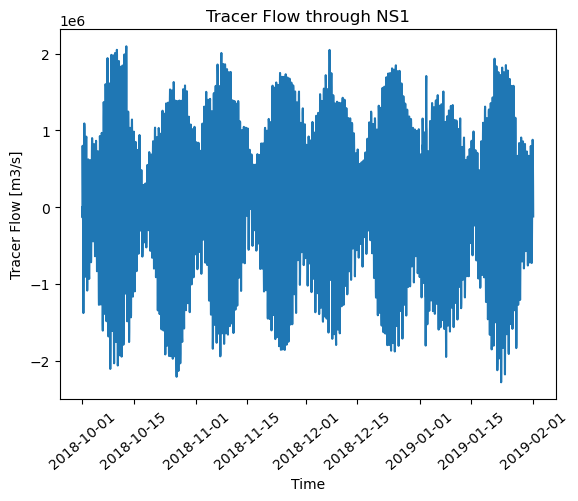

In [174]:
#Plot timeseries for 'NS1_FLOW [m^3 s^-1]' at NS1
plt.plot(merged_df['TIME'], merged_df['NS1_FLOW [m^3 s^-1]'])
plt.title('Tracer Flow through NS1')
plt.xlabel('Time')
plt.ylabel('Tracer Flow [m3/s]')
plt.xticks(rotation=40)
plt.show()

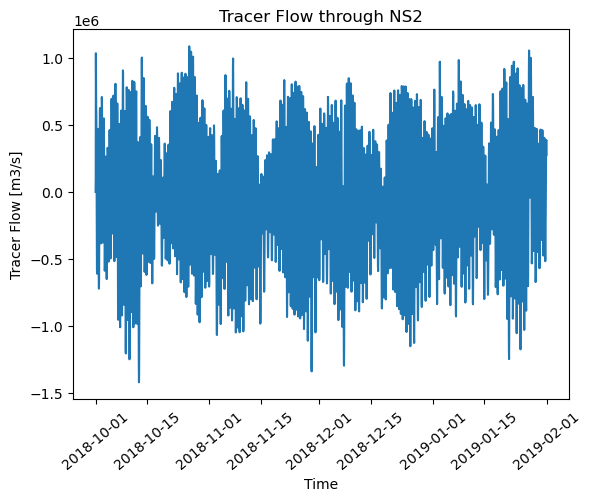

In [175]:
#Plot timeseries for 'NS2_FLOW [m^3 s^-1]' at NS1
plt.plot(merged_df['TIME'], merged_df['NS2_FLOW [m^3 s^-1]'])
plt.title('Tracer Flow through NS2')
plt.xlabel('Time')
plt.ylabel('Tracer Flow [m3/s]')
plt.xticks(rotation=40)
plt.show()

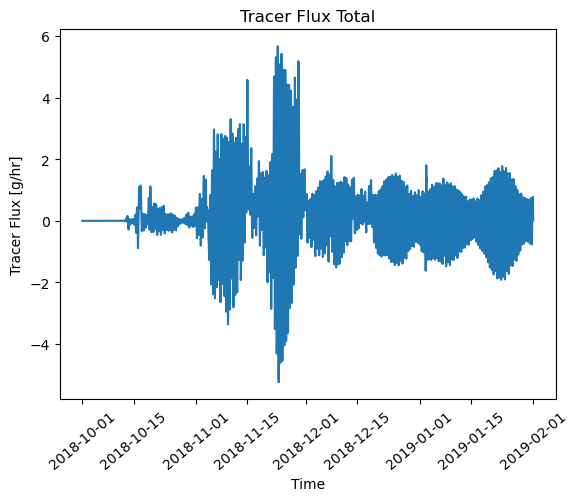

In [176]:
#Plot timeseries for 'TRACE_1_Tot_Flux [g/hr]' at NS2
plt.plot(merged_df['TIME'], merged_df['TRACE_1_Tot_Flux [g/hr]'])
plt.title('Tracer Flux Total')
plt.xlabel('Time')
plt.ylabel('Tracer Flux [g/hr]')
plt.xticks(rotation=40)
plt.show()

Concentration based on mass excluding fluxes at the boundary